# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [3]:
# And an inition condition (with everything in SI units)

"""
x, y, vx, vy = 147e9, 0, 0, 30330 

init = State(r = Vector (x, y) * m, 
             v = Vector (vx, vy) * m/s )
"""

init = State(rx = 147e9 * m, 
             ry = 0 * m,
             vx = 0 * m,
             vy = 30330 * m)

,values
rx,147000000000.0 meter
ry,0 meter
vx,0 meter
vy,30330 meter


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e7 * s)

,values
init,rx 147000000000.0 meter ry ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    rx, ry, vx, vy = state
    
    r =  Vector (rx, ry)
    unpack(system)
    
    forceM = G * m1 * m2 / r.mag**2
    x, y = pol2cart(r.angle, forceM)
    force = Vector (x, y)
    
    return force

In [6]:
universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [40]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    rx, ry, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    
    dxdt = vx
    dydt = vy
    dvdt = force / m2
    dvxdt = dvdt.x
    dvydt = dvdt.y    
    
    return dxdt, dydt, dvxdt, dvydt

In [41]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0, 'meter')>,
 <Quantity(30330, 'meter')>,
 <Quantity(0.006143082049146188, 'newton / kilogram')>,
 <Quantity(0.0, 'newton / kilogram')>)

In [53]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    rx, ry, vx, vy = state
    r = Vector(rx, ry)
    
    return r.mag - system.r_final

In [54]:
# Always test the event function!
event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [61]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details
results

,rx,ry,vx,vy
0.000000e+00,1.470000e+11,0.000000e+00,0.000000e+00,30330.000000
4.662755e-08,1.470000e+11,1.414214e-03,2.864369e-10,30330.000000
5.129030e-07,1.470000e+11,1.555635e-02,3.150805e-09,30330.000000
5.175658e-06,1.470000e+11,1.569777e-01,3.179449e-08,30330.000000
5.180321e-05,1.470000e+11,1.571191e+00,3.182313e-07,30330.000000
5.180787e-04,1.470000e+11,1.571333e+01,3.182600e-06,30330.000000
5.180834e-03,1.470000e+11,1.571347e+02,3.182629e-05,30330.000000
5.180838e-02,1.470000e+11,1.571348e+03,3.182631e-04,30330.000000
5.180839e-01,1.470000e+11,1.571348e+04,3.182632e-03,30330.000000
5.180839e+00,1.470000e+11,1.571348e+05,3.182632e-02,30330.000000


In [56]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(10000000.0, 'second')>

In [57]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(115.74074074074072, 'day')>

In [58]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [59]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [82]:
# Scaling the distance to million km

rx = results.rx / 1e9;
ry = results.ry / 1e9;

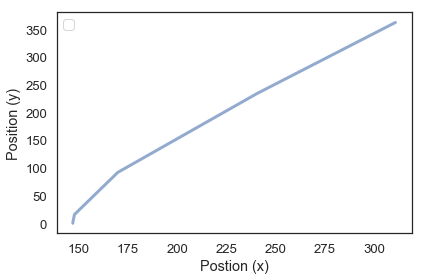

In [84]:
# And plotting

plot(rx, ry)
decorate(xlabel='Postion (x)',
         ylabel='Position (y)')